# Streamlit

- Streamlit lets you turn data scripts into shareable web apps in minutes. It’s all Python, open-source, and free! 

- And once we have created an app, we can use Streamlit cloud platform to deploy, manage, and share app!

- GitHub : https://github.com/streamlit/streamlit
- Documentation : https://streamlit.io/

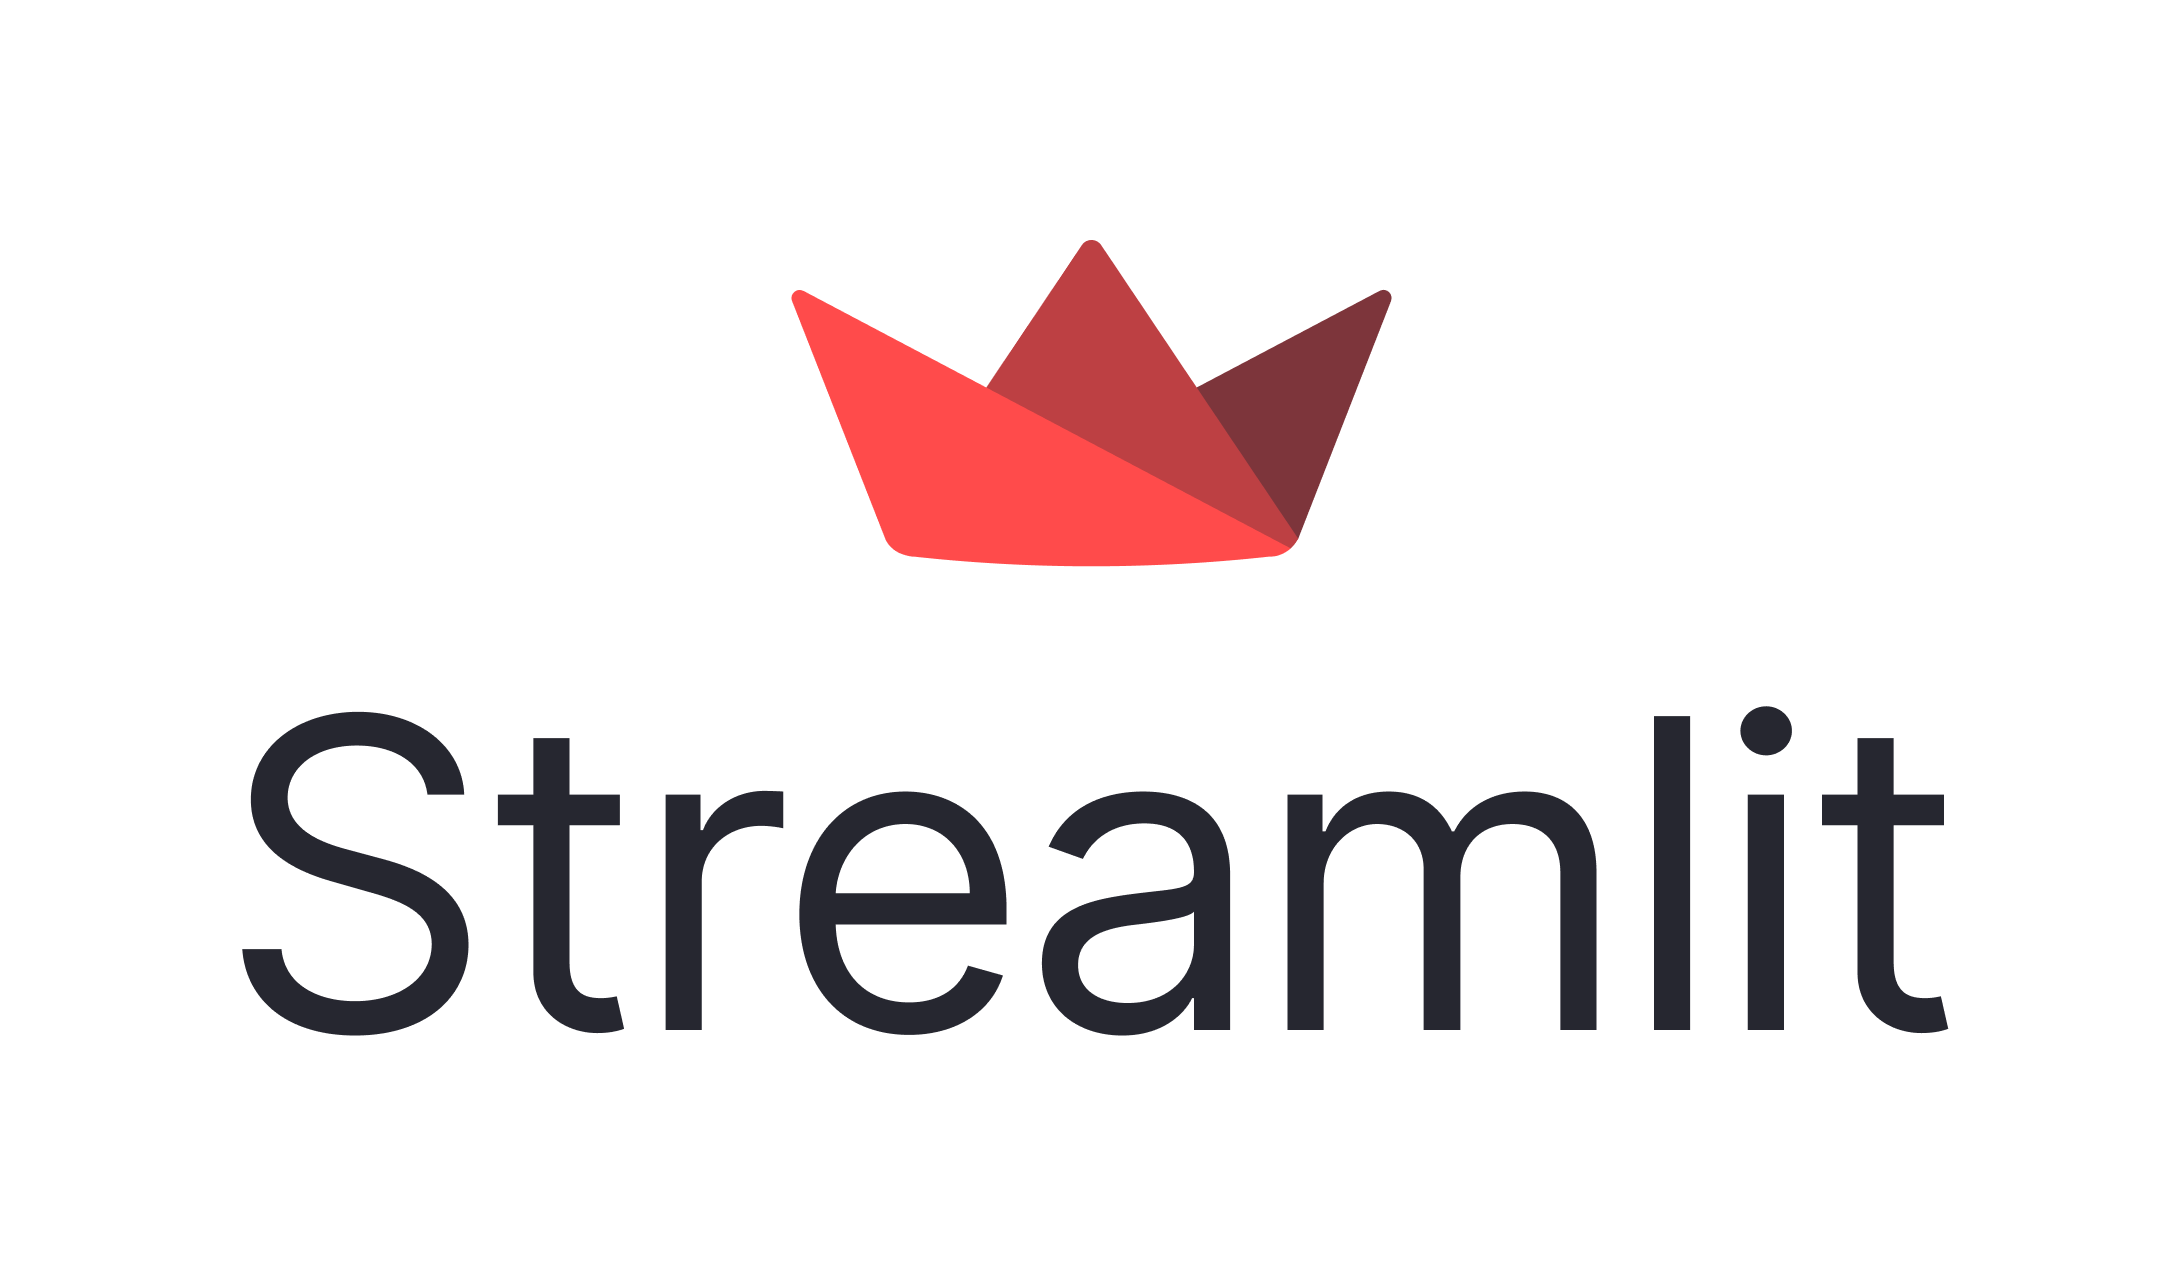

# Link: [Fraud Predictor Streamlit Web App](https://chaithanyavamshi-fraud-predictor-app-streamlit-app-qy0hjs.streamlitapp.com/)

# Streamlit Installation

In [1]:
!pip install streamlit -q

In [2]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Streamlit - Python Web App Script

In [8]:
%%writefile app.py
import numpy as np
import pickle
import time
import streamlit as st


# loading the saved model
loaded_model = pickle.load(open('/content/final_model.sav', 'rb'))




# creating a function for Prediction

@st.cache(persist=True)
def predict_fraud(card1,card2,card4,card6,addr1,addr2,TransactionAmt,P_emaildomain,ProductCD,DeviceType):
  input=np.array([[card1,card2,card4,card6,addr1,addr2,TransactionAmt,P_emaildomain,ProductCD,DeviceType]])

  prediction=loaded_model.predict_proba(input)
  pred='{0:.{1}f}'.format(prediction[0][0], 2)
  return float(pred)


  
def main():
  
  
  html_temp = """
        <div style="background-color:#000000 ;padding:10px">
        <h1 style="color:white;text-align:center;">Financial Transaction Fraud Prediction ML Web App 💰 </h1>
        </div>
     """
  st.markdown(html_temp, unsafe_allow_html=True)
 
  from PIL import Image
  image = Image.open('/content/home_banner.PNG')

  st.image(image, caption='Impacting the World of Finance and Banking with Artificial Intelligence (AI)')

  # getting the input data from the user
  st.sidebar.title("Financial Transaction Fraud Prediction System 🕵️")
  st.sidebar.subheader("Choose the Below Parameters to Predict a Financial Transaction")

  #TransactionAmt
  st.sidebar.markdown("### Transaction Amount")
  TransactionAmt = st.sidebar.number_input("Choose the Transaction Amount in USD",0,20000,step =1)
 
  
  #card1 
  st.sidebar.markdown("### Payment Card 1")
  card1 = st.sidebar.number_input("Choose the Payment Card 1 Amount (USD)",0,20000,step = 1)

  #card2 
  st.sidebar.markdown("### Payment Card 2")
  card2 = st.sidebar.number_input("Choose the Payment Card 2 Amount (USD)",0,20000,step = 1)

  #card4
  st.sidebar.markdown("### Payment Card Category")
  card4 = st.sidebar.radio("Choose the Payment Card Category",[1,2,3,4])
  st.sidebar.info("1 : Discover | 2 : Mastercard | 3 : American Express | 4 : Visa")

  #card6
  st.sidebar.markdown("### Payment Card Type")
  card6 = st.sidebar.radio("Choose the Payment Card Type",[1,2])
  st.sidebar.info("1 : Credit | 2 : Debit")

   #addr1
  st.sidebar.markdown("### Billing Zip Code")
  addr1 = st.sidebar.slider("Choose the Payment Billing Zip Code",0,500,step =1)


  #addr2
  st.sidebar.markdown("### Billing Country Code")
  addr2 = st.sidebar.slider("Choose the Payment Billing Country Code",0,100,step =1)
 
  #P_emaildomain
  st.sidebar.markdown("### Purchaser Email Domain")
  P_emaildomain = st.sidebar.selectbox("Choose the Purchaser Email Domain", [0,1,2,3,4])
  st.sidebar.info("0 : Gmail (Google) | 1 : Outlook (Microsoft)  | 2 : Mail.com | 3 : Others | 4 : Yahoo")
 
  #ProductCD
  st.sidebar.markdown("### Product Code")
  ProductCD = st.sidebar.selectbox("Choose the Product Code",[0,1,2,3,4])
  st.sidebar.info("0 : C | 1 : H | 2 : R | 3 : S | 4 : W")

  #DeviceType
  st.sidebar.markdown("### Device Type")
  DeviceType = st.sidebar.radio("Choose the Payment Device Type",[1,2])
  st.sidebar.info("1 : Mobile | 2 : Desktop")
    
  

  safe_html = """ 
    <img src="https://media.giphy.com/media/g9582DNuQppxC/giphy.gif" alt="confirmed" style="width:698px;height:350px;"> 
    """

  danger_html = """  
    <img src="https://media.giphy.com/media/8ymvg6pl1Lzy0/giphy.gif" alt="cancel" style="width:698px;height:350px;">
    """

 
  # creating a button for Prediction
   
  if st.button("Click Here To Predict"):
    output = predict_fraud(card1,card2,card4,card6,addr1,addr2,TransactionAmt,P_emaildomain,ProductCD,DeviceType)
    final_output = output * 100
    st.subheader('Probability Score of Financial Transaction is {}% '.format(final_output))

    if final_output > 75.0:
      st.markdown(danger_html, unsafe_allow_html=True)
      st.error("**OMG! Financial Transaction is Fraud**")
    else:
      st.balloons()
      time.sleep(5)
      st.balloons()
      time.sleep(5)
      st.balloons()
      st.markdown(safe_html, unsafe_allow_html=True)
      st.success("**Hurray! Transaction is Legitimate**")
    
if __name__ == '__main__':
    main()

Overwriting app.py


In [4]:
from pyngrok import ngrok
ngrok.set_auth_token("2EE0dDo8S9ihJeGTe8Dj5ZSzYM7_vEwQBGQokbZaQ2bZ6HBJ") #ngrok.com
#!ngrok authtoken 2EE0dDo8S9ihJeGTe8Dj5ZSzYM7_vEwQBGQokbZaQ2bZ6HBJ

In [5]:
!nohup streamlit run app.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)

nohup: appending output to 'nohup.out'
NgrokTunnel: "http://8d85-34-125-14-198.ngrok.io" -> "http://localhost:80"


In [ ]:
from pyngrok import ngrok

tunnels = ngrok.get_tunnels()
tunnels

# try:
#     # Block until CTRL-C or some other terminating event
#     ngrok_process.proc.wait()
# except KeyboardInterrupt:
#     print(" Shutting down server.")

[<NgrokTunnel: "https://c6ce-34-125-243-125.ngrok.io" -> "http://localhost:80">,
 <NgrokTunnel: "http://c6ce-34-125-243-125.ngrok.io" -> "http://localhost:80">]

In [ ]:
ngrok.kill()

In [ ]:
#!streamlit run app.py & npx localtunnel --port 8501

In [ ]:
#!pip freeze > requirements.txt

In [ ]:
#!cat requirements.txt